# Intensive Care in Germany

## Data Source

[DIVI-Intensivregister](https://www.intensivregister.de/) monitors the ICU capacities of 1,300 hospitals in Germany.

## Setup

In [29]:
# standard library
import datetime
import math

In [30]:
# third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Date this Notebook was run

In [31]:
today = datetime.datetime.today().strftime('%Y-%m-%d')
today

'2021-11-07'

In [32]:
# style like ggplot in R
plt.style.use('ggplot')

In [33]:
# Avoid cutting off part of the axis labels, see:
# https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.rcParams.update({'figure.autolayout': True})

## Get Data

In [34]:
timeline_data = "https://diviexchange.blob.core.windows.net/%24web/bundesland-zeitreihe.csv"

In [35]:
timeline_df = pd.read_csv(timeline_data)

In [36]:
timeline_df.tail(3)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
10146,2021-11-06T12:15:00+01:00,SACHSEN,79,249,1142,181,704,188,37,19,21,29,10
10147,2021-11-06T12:15:00+01:00,MECKLENBURG_VORPOMMERN,34,24,525,86,221,64,31,14,6,10,4
10148,2021-11-06T12:15:00+01:00,DEUTSCHLAND,1314,2441,19282,2666,10161,2265,820,358,260,556,140


## Rename Columns

### Convert datatype of date column

In [37]:
timeline_df["Datum"] = timeline_df["Datum"].str[:10]
timeline_df.head()

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
0,2020-03-20,SACHSEN_ANHALT,8,0,2,105,0,60,0,6,2,0,0
1,2020-03-20,RHEINLAND_PFALZ,15,14,48,112,0,62,0,10,3,2,0
2,2020-03-20,NORDRHEIN_WESTFALEN,55,35,86,456,0,297,0,49,5,1,0
3,2020-03-20,BREMEN,3,2,0,18,0,11,0,1,1,1,0
4,2020-03-20,BRANDENBURG,20,2,50,142,0,81,0,15,4,1,0


In [38]:
timeline_df.iloc[ : , [0]] = timeline_df.iloc[ : , [0]].apply(pd.to_datetime)

In [39]:
timeline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10149 entries, 0 to 10148
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Datum                                       10149 non-null  datetime64[ns]
 1   Bundesland                                  10149 non-null  object        
 2   Anzahl_Meldebereiche_Erwachsene             10149 non-null  int64         
 3   Aktuelle_COVID_Faelle_Erwachsene_ITS        10149 non-null  int64         
 4   Belegte_Intensivbetten_Erwachsene           10149 non-null  int64         
 5   Freie_Intensivbetten_Erwachsene             10149 non-null  int64         
 6   7_Tage_Notfallreserve_Erwachsene            10149 non-null  int64         
 7   Freie_IV_Kapazitaeten_Gesamt                10149 non-null  int64         
 8   Freie_IV_Kapazitaeten_Davon_COVID           10149 non-null  int64         
 9   Betrie

In [40]:
federal_level = timeline_df[timeline_df.Bundesland=='DEUTSCHLAND']
federal_level.tail(3)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
10114,2021-11-04,DEUTSCHLAND,1316,2326,19797,2503,10322,2225,807,402,251,525,138
10131,2021-11-05,DEUTSCHLAND,1315,2412,19682,2461,10193,2181,814,380,251,544,140
10148,2021-11-06,DEUTSCHLAND,1314,2441,19282,2666,10161,2265,820,358,260,556,140


## Used Beds (Adults)

In [41]:
used_beds = federal_level.loc[ : , ['Datum', 'Belegte_Intensivbetten_Erwachsene']]
used_beds.columns = ['date', 'ICU beds in use (adults)']
used_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 16 to 10148
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      597 non-null    datetime64[ns]
 1   ICU beds in use (adults)  597 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 14.0 KB


In [42]:
used_beds.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

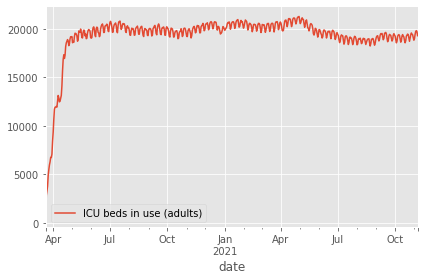

In [43]:
used_beds.plot()

## Covid-19 patients in ICU

In [44]:
icu = federal_level.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]

In [45]:
icu.columns = ['date', 'Covid-19 cases in ICU']
icu.set_index('date', inplace=True)
icu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 597 entries, 2020-03-20 to 2021-11-06
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  597 non-null    int64
dtypes: int64(1)
memory usage: 9.3 KB


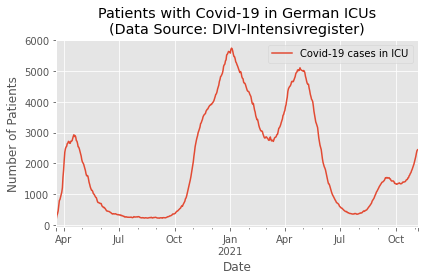

In [46]:
icu_cases = icu.plot(
    title='Patients with Covid-19 in German ICUs\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

In [47]:
fig = icu_cases.get_figure()
fig.savefig('img/covid-19-patients-in-icu-germany.png')

### Situation in North Rhine-Westphalia

NRW ist the state in Germany with the highest number of inhabitants.

In [48]:
nrw = timeline_df[timeline_df.Bundesland=='NORDRHEIN_WESTFALEN']
nrw.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
10117,2021-11-05,NORDRHEIN_WESTFALEN,313,400,4771,555,2384,470,216,103,63,128,19
10134,2021-11-06,NORDRHEIN_WESTFALEN,313,412,4691,592,2358,532,225,96,65,133,19


In [49]:
icu_nrw = nrw.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_nrw.columns = ['date', 'Covid-19 cases in ICU']
icu_nrw.set_index('date', inplace=True)
icu_nrw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 597 entries, 2020-03-20 to 2021-11-06
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  597 non-null    int64
dtypes: int64(1)
memory usage: 9.3 KB


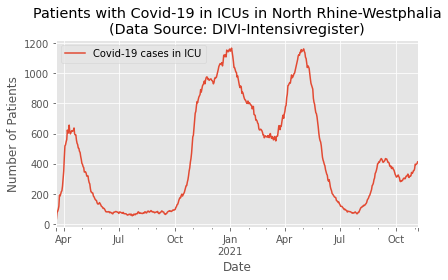

In [50]:
icu_cases_nrw = icu_nrw.plot(
    title='Patients with Covid-19 in ICUs in North Rhine-Westphalia\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

### Situation in Rhineland-Palatinate

In [51]:
rlp = timeline_df[timeline_df.Bundesland=='RHEINLAND_PFALZ']
rlp.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
10116,2021-11-05,RHEINLAND_PFALZ,77,85,863,141,408,107,50,22,20,31,4
10133,2021-11-06,RHEINLAND_PFALZ,77,88,824,173,409,120,50,23,17,32,5


In [52]:
icu_rlp = rlp.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_rlp.columns = ['date', 'Covid-19 cases in ICU']
icu_rlp.set_index('date', inplace=True)
icu_rlp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 597 entries, 2020-03-20 to 2021-11-06
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  597 non-null    int64
dtypes: int64(1)
memory usage: 9.3 KB


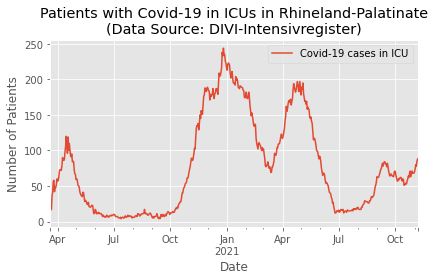

In [53]:
icu_cases_rlp = icu_rlp.plot(
    title='Patients with Covid-19 in ICUs in Rhineland-Palatinate\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

### Situation in Saxony

Saxonia had high case numbers during the pandemic.

In [54]:
saxonia = timeline_df[timeline_df.Bundesland=='SACHSEN']
saxonia.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
10129,2021-11-05,SACHSEN,79,249,1195,135,702,180,36,23,18,28,10
10146,2021-11-06,SACHSEN,79,249,1142,181,704,188,37,19,21,29,10


In [55]:
icu_saxonia = saxonia.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_saxonia.columns = ['date', 'Covid-19 cases in ICU']
icu_saxonia.set_index('date', inplace=True)
icu_saxonia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 597 entries, 2020-03-20 to 2021-11-06
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  597 non-null    int64
dtypes: int64(1)
memory usage: 9.3 KB


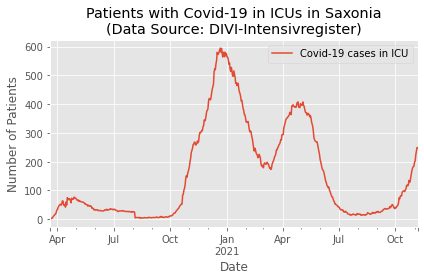

In [56]:
icu_cases_saxonia = icu_saxonia.plot(
    title='Patients with Covid-19 in ICUs in Saxonia\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')